In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os 
import seaborn as sns
from pathlib import Path


In [3]:
df = pd.read_csv('D:/github/python projects/Analysis/sustainable_goal_affordable_ and_clean_renewable_enargy/Analysis/Food waste and research/data/processed/Food_waste_data_and_research_cleaned.csv')

# --- Exploratory Data Analysis (EDA) ---

### --- Categorical Feature Analysis ---

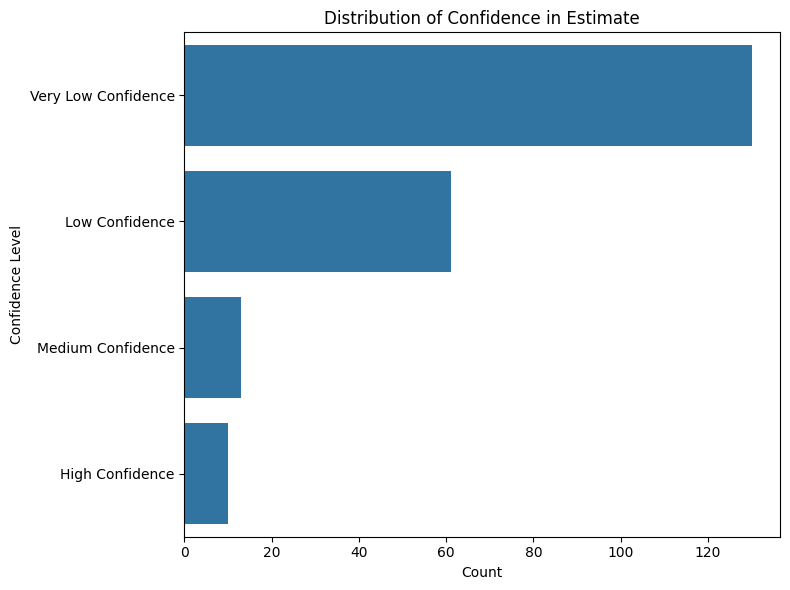

In [6]:
# Plot the distribution of the 'Confidence in estimate' column.
plt.figure(figsize=(8, 6))
sns.countplot(y=df['confidence_in_estimate'], order=df['confidence_in_estimate'].value_counts().index)
plt.title('Distribution of Confidence in Estimate')
plt.xlabel('Count')
plt.ylabel('Confidence Level')
plt.tight_layout()
# Save the plot as an image file.
output_dir = Path.cwd().parent / "reports" / "figures"
output_dir.mkdir(parents=True, exist_ok=True)
output_filepath = output_dir / "confidence_in_estimate_distribution.png"
plt.savefig(output_filepath)
plt.show() # Display the plot

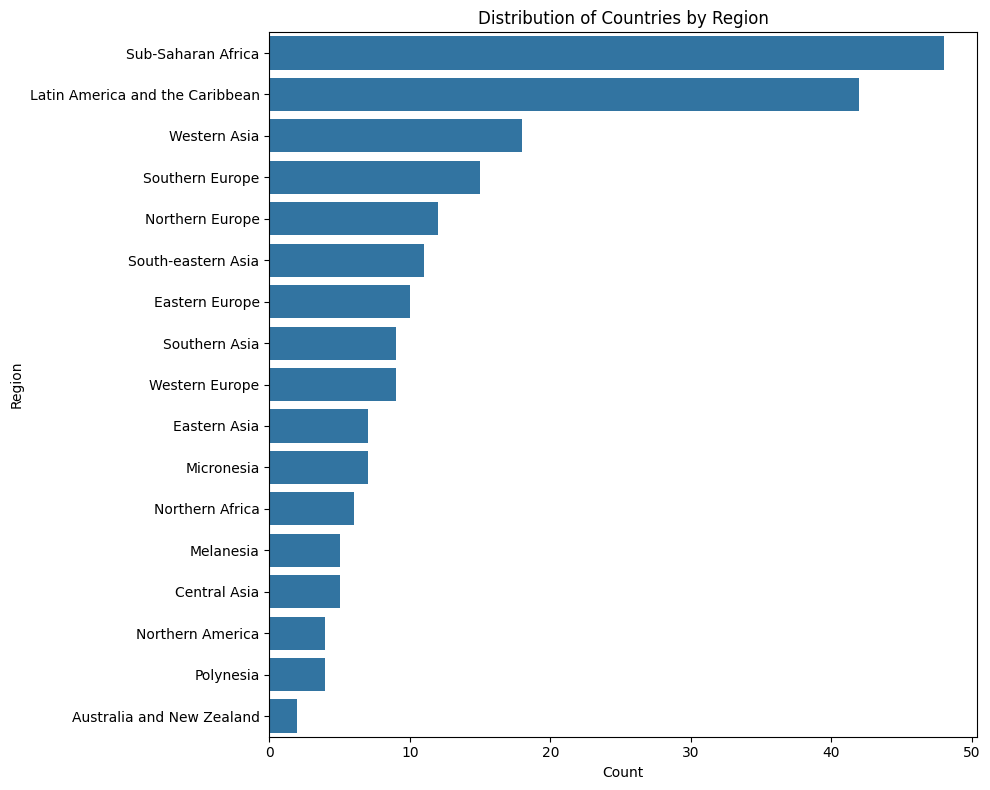

In [7]:
# Plot the distribution of countries by region.
plt.figure(figsize=(10, 8))
sns.countplot(y=df['region'], order=df['region'].value_counts().index)
plt.title('Distribution of Countries by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.tight_layout()
# Save the plot as an image file.
output_dir = Path.cwd().parent / "reports" / "figures"
output_dir.mkdir(parents=True, exist_ok=True)
output_filepath = output_dir / "region_distribution.png"
plt.savefig(output_filepath)
plt.show() # Display the plot

# --- Numerical Feature Analysis ---

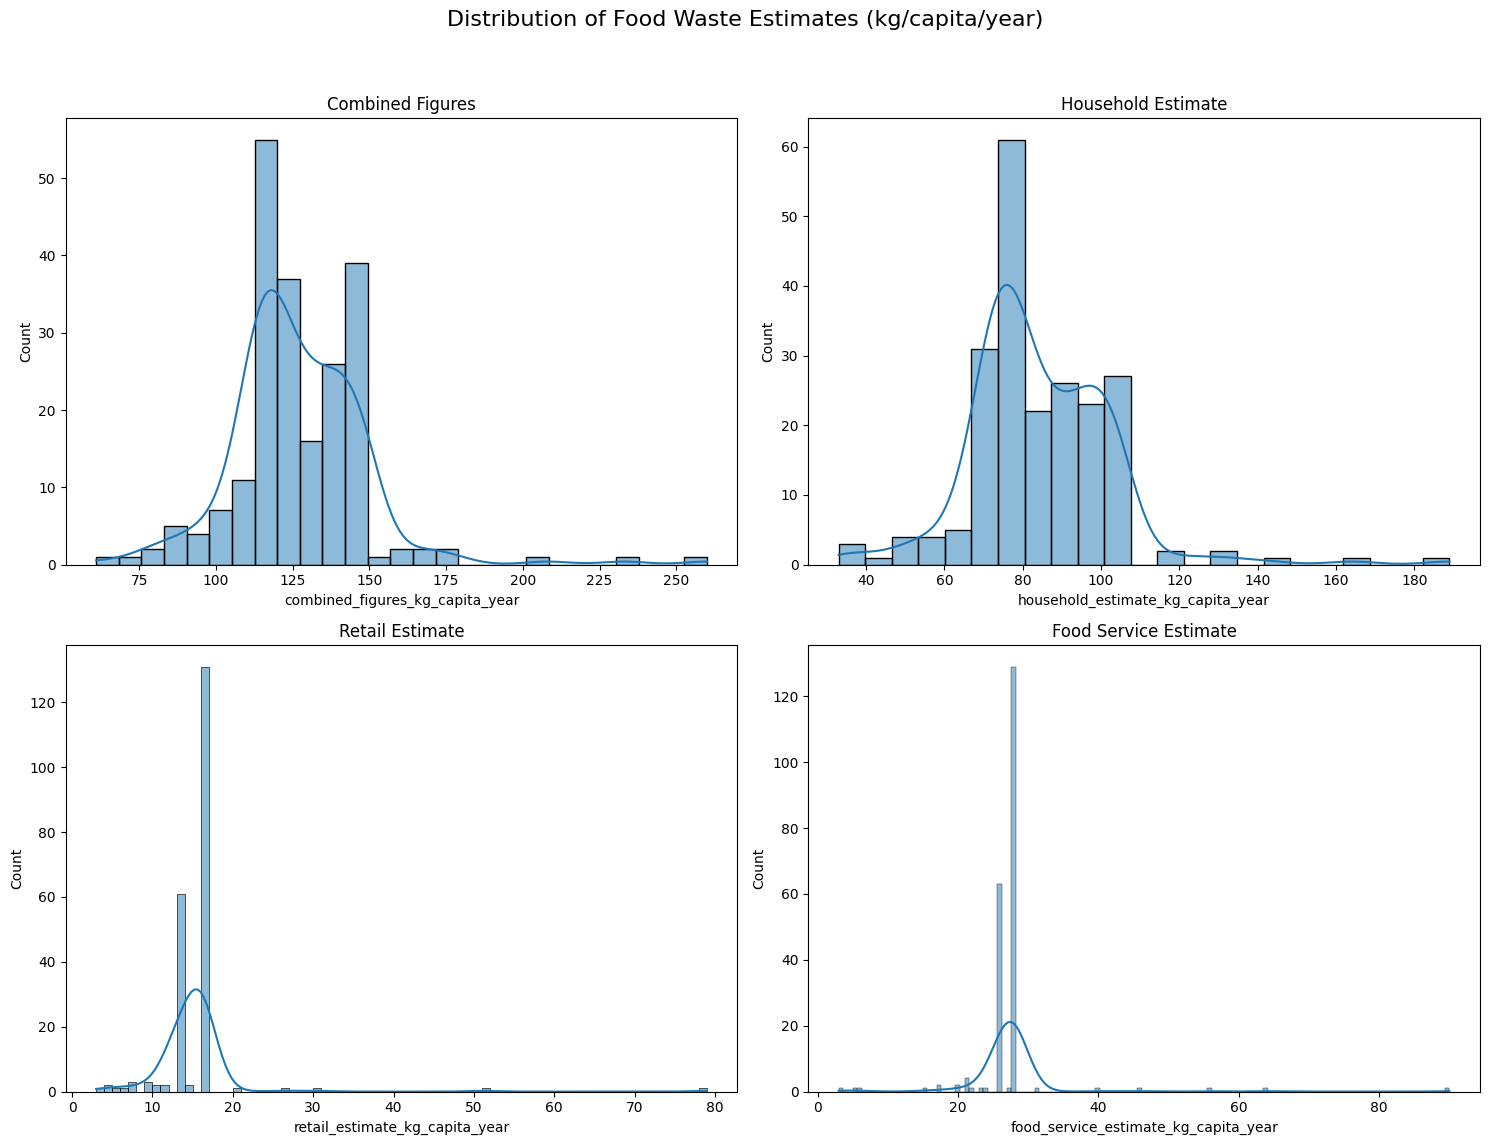

In [9]:
# Create histograms to show the distribution of key food waste estimates.
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Food Waste Estimates (kg/capita/year)', fontsize=16)

sns.histplot(df['combined_figures_kg_capita_year'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Combined Figures')

sns.histplot(df['household_estimate_kg_capita_year'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Household Estimate')

sns.histplot(df['retail_estimate_kg_capita_year'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Retail Estimate')

sns.histplot(df['food_service_estimate_kg_capita_year'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Food Service Estimate')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Save the plot as an image file.
output_dir = Path.cwd().parent / "reports" / "figures"
output_dir.mkdir(parents=True, exist_ok=True)
output_filepath = output_dir / "food_waste_distributions.png"
plt.savefig(output_filepath)
plt.show() # Display the plot

### Correlation matrix

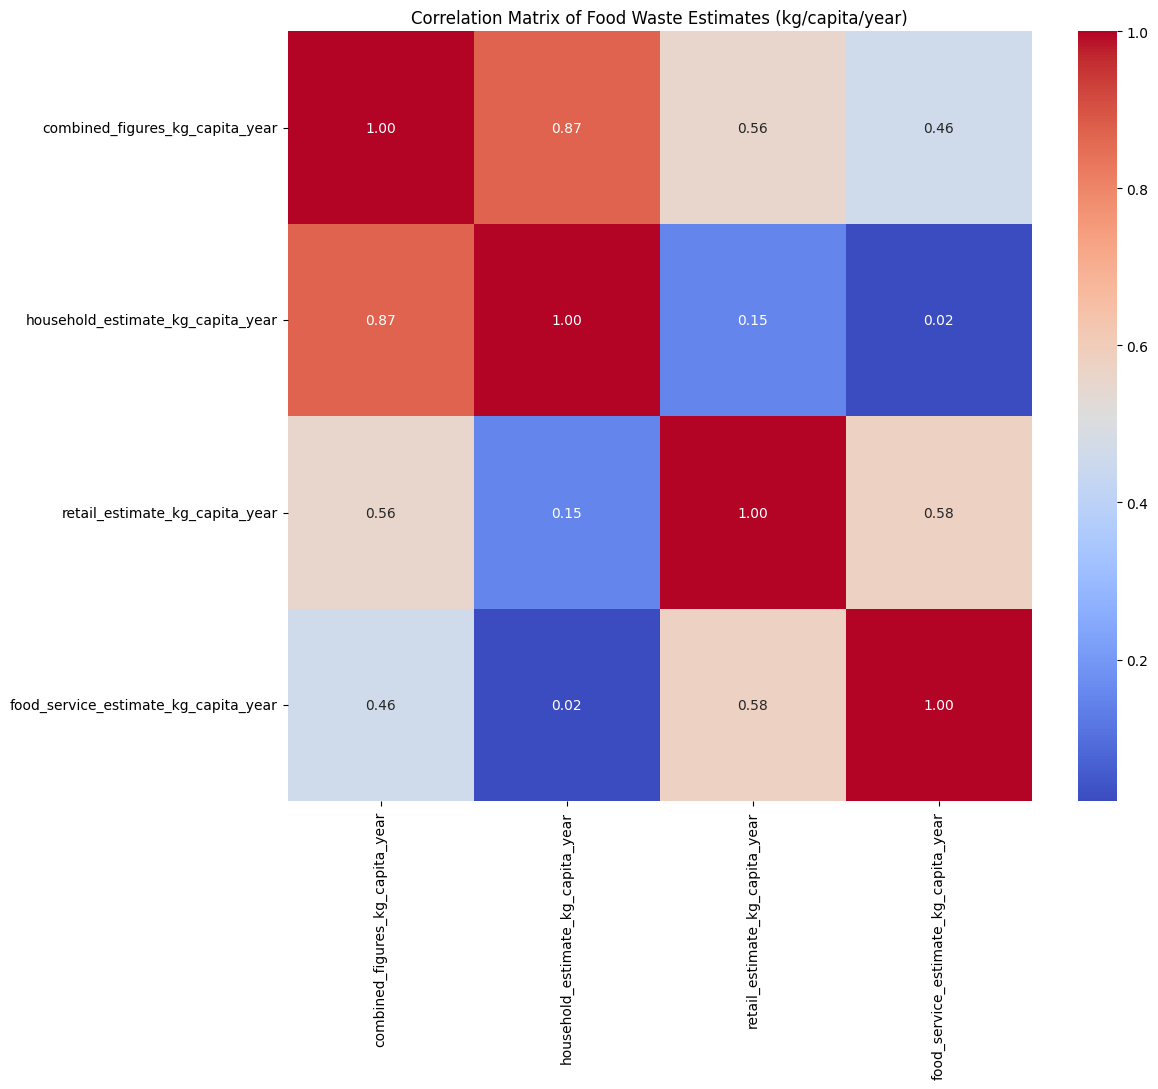

In [12]:

plt.figure(figsize=(12, 10))
correlation_matrix = df[['combined_figures_kg_capita_year', 'household_estimate_kg_capita_year',
                          'retail_estimate_kg_capita_year', 'food_service_estimate_kg_capita_year']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Food Waste Estimates (kg/capita/year)')
# Save the plot as an image file.
# --- Top/Bottom Countries Analysis ---
output_dir = Path.cwd().parent / "reports" / "figures"
output_dir.mkdir(parents=True, exist_ok=True)
output_filepath = output_dir / "correlation_heatmap.png"
plt.savefig(output_filepath)
plt.show() # Display the plot

## --- Top/Bottom Countries Analysis ---


C:\Users\gkk46\AppData\Local\Temp\ipykernel_34296\4111203964.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='combined_figures_kg_capita_year', y='country', data=top_10_waste, palette='Reds_r')


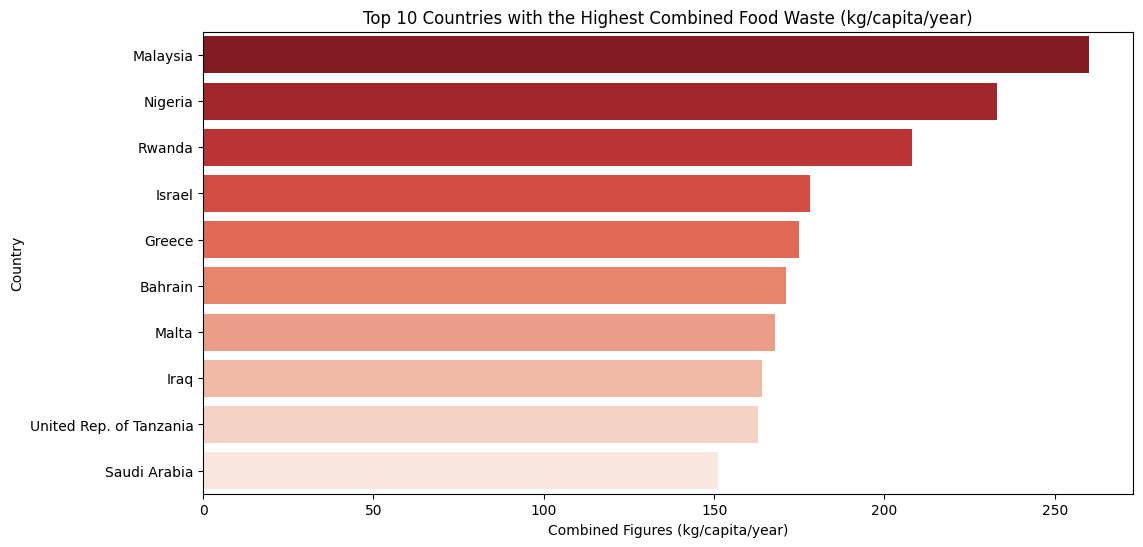

In [13]:

# Identify and plot the top 10 countries with the highest combined food waste.
top_10_waste = df.nlargest(10, 'combined_figures_kg_capita_year')
plt.figure(figsize=(12, 6))
sns.barplot(x='combined_figures_kg_capita_year', y='country', data=top_10_waste, palette='Reds_r')
plt.title('Top 10 Countries with the Highest Combined Food Waste (kg/capita/year)')
plt.xlabel('Combined Figures (kg/capita/year)')
plt.ylabel('Country')
# Save the plot as an image file.
output_dir = Path.cwd().parent / "reports" / "figures"
output_dir.mkdir(parents=True, exist_ok=True)
output_filepath = output_dir / "top_10_highest_waste.png"
plt.savefig(output_filepath)
plt.show() # Display the plot


### Identify and plot the top 10 countries with the lowest combined food waste.

C:\Users\gkk46\AppData\Local\Temp\ipykernel_34296\3035162529.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='combined_figures_kg_capita_year', y='country', data=bottom_10_waste, palette='Greens_r')


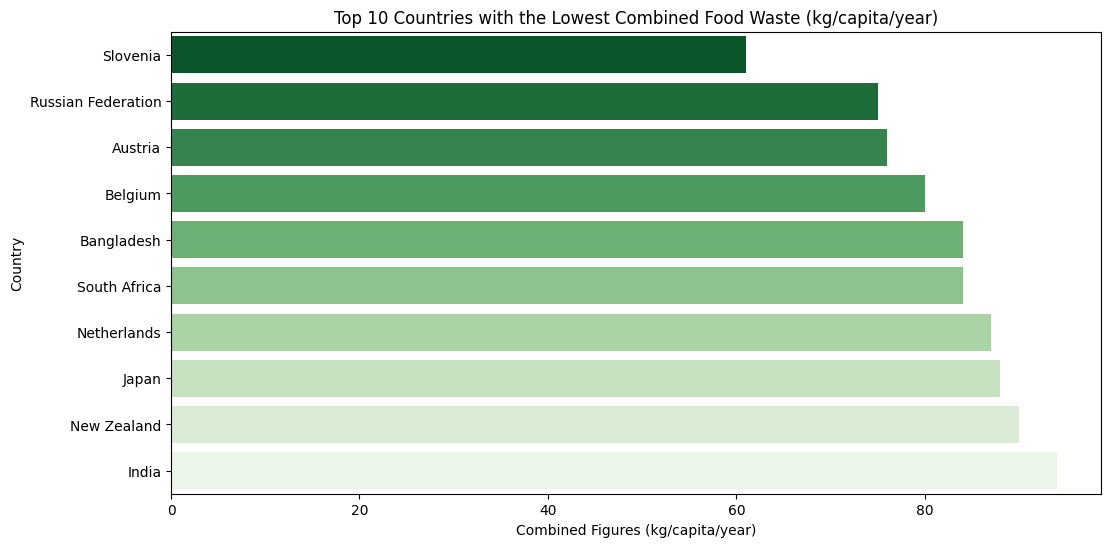

In [14]:

bottom_10_waste = df.nsmallest(10, 'combined_figures_kg_capita_year')
plt.figure(figsize=(12, 6))
sns.barplot(x='combined_figures_kg_capita_year', y='country', data=bottom_10_waste, palette='Greens_r')
plt.title('Top 10 Countries with the Lowest Combined Food Waste (kg/capita/year)')
plt.xlabel('Combined Figures (kg/capita/year)')
plt.ylabel('Country')
# Save the plot as an image file.
output_dir = Path.cwd().parent / "reports" / "figures"
output_dir.mkdir(parents=True, exist_ok=True)
output_filepath = output_dir / "top_10_lowest_waste.png"
plt.savefig(output_filepath)
plt.show() # Display the plot
